In [1]:
%load_ext autoreload
%autoreload 2

from IPython.core.display import HTML
HTML("<style>.container { width: 90% !important; }</style>")

In [2]:
import utils

import sneks
import gym

from tqdm.notebook import trange
import numpy as np
import torch
import torch.nn as nn

utils.info

{'torch_version': '1.3.1', 'torch_device': 'cuda', 'gym_version': '0.17.1'}

In [3]:
utils.use_virtual_display()

':1061'

In [4]:
# env = gym.make('snek-rgb-16-v1')
env = gym.make('CartPole-v1')

observation = env.reset()
action = env.action_space.sample()
observation, reward, done, info = env.step(action)

num_actions = env.action_space.n
obs_size = np.prod(env.observation_space.shape)

obs_size, num_actions, env.reward_range, # env.unwrapped.unwrapped.get_action_meanings()

(4, 2, (-inf, inf))

In [5]:
dqn = utils.DQNAgent(obs_size, num_actions)

dqn_persist, dqn_load_if_exists = utils.model_persistor(dqn, './.models/dqn.pkl')


In [ ]:
dqn_load_if_exists()

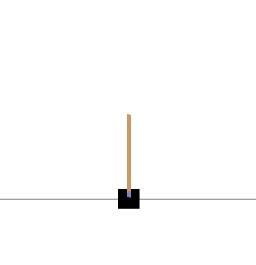

In [6]:
frames_generator = utils.play_env(env, dqn, duration=100)
utils.i_python_display_frames(frames_generator, fps=30)

In [7]:
generator = utils.ExperienceGenerator()(env, dqn, bs=100)
batch = next(generator)
[t.shape for t in batch]

[(100, 4), (100,), (100,), (100, 4), (100,)]

<IPython.core.display.Javascript object>


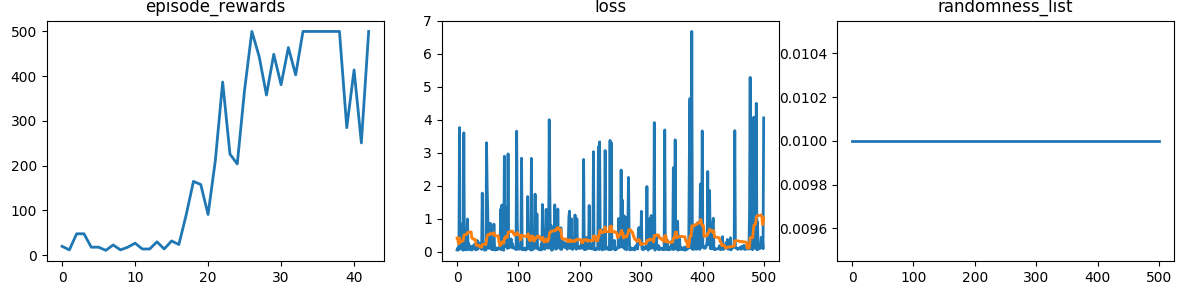

In [8]:
%matplotlib notebook
its = 10_000

generator = utils.ExperienceGenerator()
next_batch = generator(env, dqn, bs=128)
optimize = dqn.optimizer(next_batch, lr=0.001)
plotter = utils.Plotter()

tr = trange(its, bar_format="{bar}{l_bar}{r_bar}")
for i in tr:
    info = next(optimize)
    plotter.log(**info)
    plotter.log(episode_rewards=generator.episode_rewards[:-1])
    plotter.log(randomness_list=generator.randomness_list)

    tr.set_description(' | '.join([
        'LOSS: %.6f' % info['loss'],
        'EP REWARD: %.2f' % np.mean(generator.episode_rewards[-5:-1]),
    ]))

    if i % 200 == 0: plotter.plot()

In [9]:
dqn_persist()

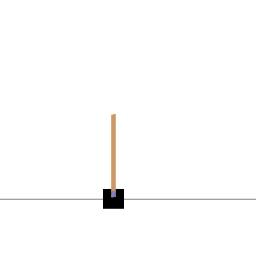

In [12]:
frames_generator = utils.play_env(env, dqn, duration=200)
utils.i_python_display_frames(frames_generator, fps=60)

In [17]:
class RNNWorldModel(nn.Module):
    

1

In [21]:
e = nn.Embedding(num_embeddings=10, embedding_dim=16)

In [27]:
idxs = torch.randint(0, 10, (3,))
idxs

tensor([9, 4, 3])

In [29]:
e(idxs).shape

torch.Size([3, 16])

In [55]:
l = nn.Linear(20, 30)

In [45]:
rnn = nn.GRU(input_size=10, hidden_size=20, num_layers=2, batch_first=True)
rnn

GRU(10, 20, num_layers=2, batch_first=True)

In [50]:
x = torch.rand(7, 5, 10)
h = torch.rand(2, 7, 20)

In [51]:
out, hn = rnn(x, h)

In [52]:
out.shape

torch.Size([7, 5, 20])

In [56]:
l(out).shape

torch.Size([7, 5, 30])

In [74]:
t = torch.rand(3, 128)
torch.stack(t.chunk(2, dim=1), dim=0).shape

torch.Size([2, 3, 64])